<h1><span style="color:red">Градиентный спуск на пальцах</span></h1>

Градиентный спуск - метод нахождения локального экстремума. В этом "алгоритме" используется движение вдоль градиента.

<h4><span style="color:#00FFFF">Нахождение локального минимума</span></h4>
Для этого используется следующая формула для поиска локального минимума:

$x_{i+1} = x_i - \sigma f^{'}(x_i)$, где $\sigma$ - темп спуска

Разберём метод спуска на примере с параболой, заданной формулой:
$f(x) = x^2 - 3x - 15$

Для начала построим её график:

In [1]:
from math import pi

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

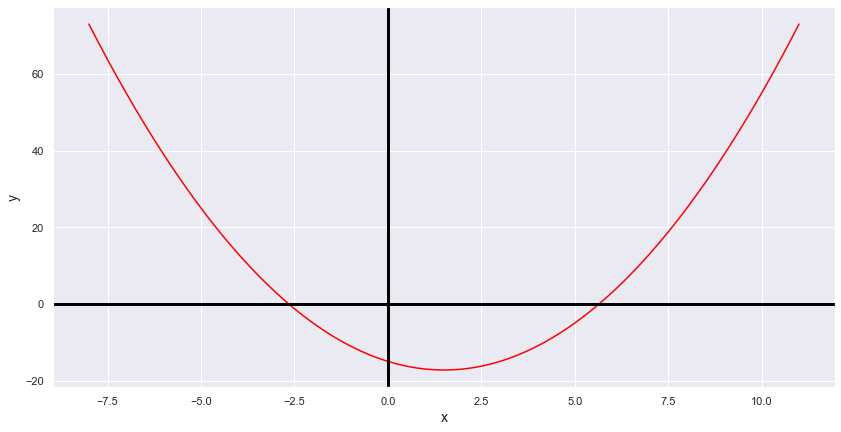

In [2]:
x = np.linspace(-8, 11, 1000)

def f(x):
    return x**2 - 3*x - 15

def get_plot(x, f):
    sns.set()
    fig = plt.figure(figsize=(14, 7))
    axes = fig.subplots()
    axes.plot(x, f(x), color='red')
    axes.set_xlabel('x', fontsize=14)
    axes.set_ylabel('y', fontsize=14)
    axes.grid(True)
    axes.axhline(y=0, color='black', linewidth=3)
    axes.axvline(x=0, color='black', linewidth=3)
    
    return axes
    
axes = get_plot(x, f)    

Теперь вычислим производную от выражения, представляющего нашу параболу:

$f^{'}(x) = {(x^2 - 3x - 15)}^{'} = {(x^2)}^{'} - {(3x)}^{'} - {(15)}^{'} = 2x - 3$

Заметим, что локальным минимумом является точка $x_0 = 1,5$, т.е. решение уравнения $f^{'}(x) = 0$

In [3]:
def df(x):
    return 2*x - 3

Прекрасно. Теперь выберем начальную точку $x_0 = -5$.
Реализуем функцию спуска, отображающую результат на графике функции.

In [4]:
def gradient_descent_to_min(x0=0, sigma=1, f=lambda x : x, df=lambda x: 1, iters=10, axes=None):   
    x = x0
    for i in range(iters):
        x0 -= sigma * df(x0)
        
        if axes:
            axes.scatter([x0], [f(x0)], color='blue', linewidths=3)
            axes.plot([x, x0], [f(x), f(x0)], color='green')
         
        x = x0
        
    return x0    

1.200932837244928

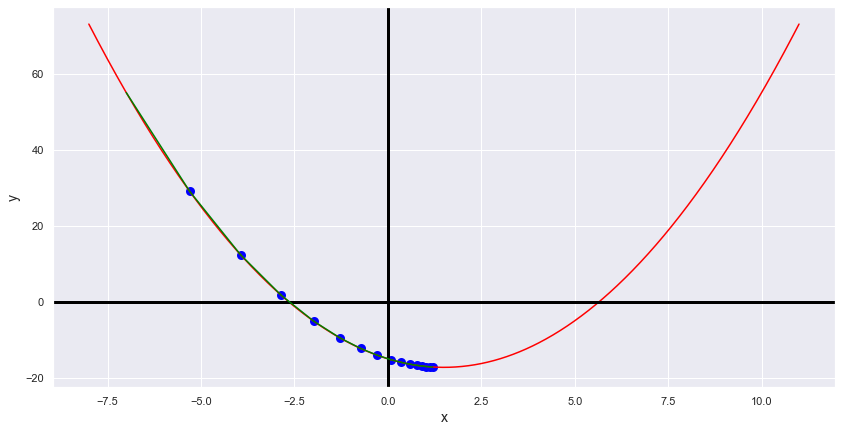

In [5]:
axes = get_plot(x, f)
gradient_descent_to_min(x0=-7, sigma=0.1, f=f, df=df, iters=15, axes=axes)

Теперь попробуем выбрать точку $x_0 = 10$.

1.799067162755072

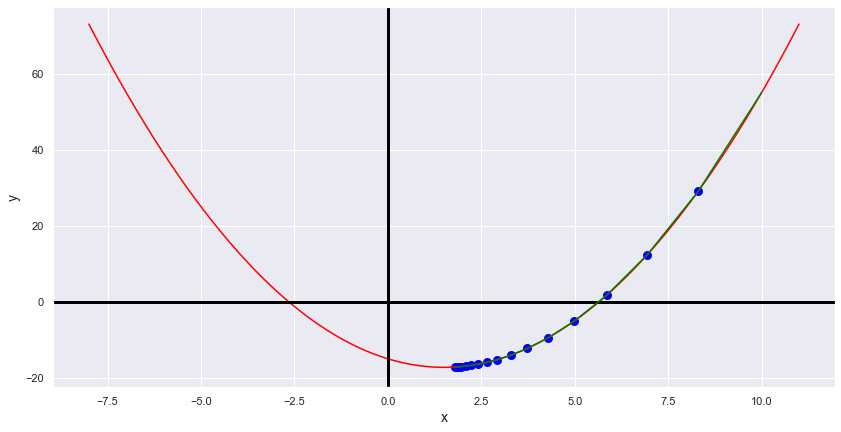

In [6]:
axes = get_plot(x, f)
gradient_descent_to_min(x0=10, sigma=0.1, f=f, df=df, iters=15, axes=axes)

<h4><span style="color:#00FFFF">Почему так работает?</span></h4>
Как мы знаем, знак $f^{'}(x)$ в точке $x_0$ зависит от того, спадает или возрастает функция в 

окрестности точки $x_0$.

Если функция спадает, то $f^{'}(x) < 0$, и наоборот. 

Теперь рассмотрим наш пример. Если мы зафиксируем $x_0 = -5$, то производная будет иметь отрицательное значение, а это значит, что выражение <span style="font-family:monospace; color:#F781F3">x0 -= sigma*df(x0)</span> будет только увеличивать значение $x_0$. 

В случае, когда $x_0 = 10$, $f^{'}(x) > 0 \Rightarrow $ выражение <span style="font-family:monospace; color:#F781F3">x0 -= sigma*df(x0)</span> будет уменьшать значение $x_0$.

<h4><span style="color:#00FFFF">Нахождение локального максимума</span></h4>
Для этого используется всё та же логика, только меняется знак $\Delta x = (x_{i+1} - x_i)$.

$$x_{i+1} = x_i + \sigma f^{'}(x)$$

Немного изменим функцию градиентного спуска:

In [7]:
def gradient_descent_to_max(x0=0, sigma=1, f=lambda x : x, df=lambda x: 1, iters=10, axes=None):   
    x = x0
    for i in range(iters):
        x0 += sigma * df(x0)
        
        if axes:
            axes.scatter([x0], [f(x0)], color='blue', linewidths=3)
            axes.plot([x, x0], [f(x), f(x0)], color='green')
         
        x = x0
        
    return x0  

Теперь протестируем наш алгоритм на функции $sin(\frac{x}2)$.

In [8]:
x = np.linspace(-4*pi, 4*pi, 1000)

def f(x):
    return np.sin(x / 2)

Как известно, $sin^{'}\frac{x}2 = \frac{1}2 cos \frac{x}2$.

In [9]:
def df(x):
    return 0.5 * np.cos(x / 2)

0.24944500917863238

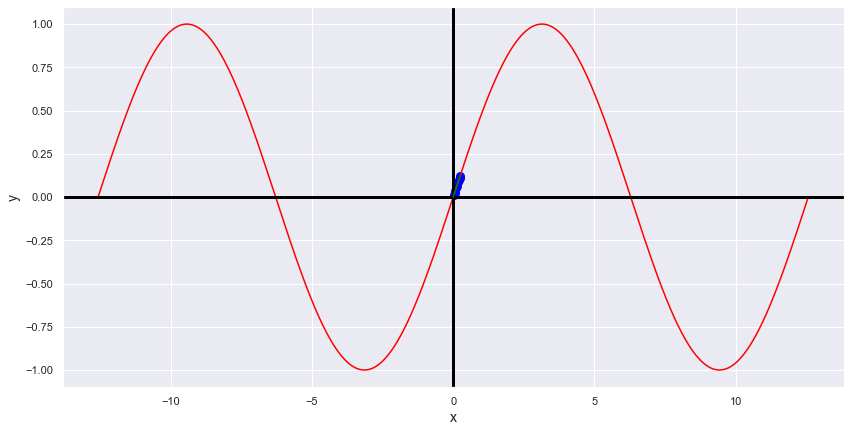

In [10]:
axes = get_plot(x, f)
gradient_descent_to_max(x0=0, sigma=0.05, f=f, df=df, iters=10, axes=axes)

Здесь же мы наблюдаем проблему выбора темпа спуска. Давайте проверим результат выполнения фрагмента кода, заменив <span style="font-family:monospace; color:#F781F3">sigma = 0.05</span> на <span style="font-family:monospace; color:#F781F3">sigma=0.5</span>.

2.0684969932283006

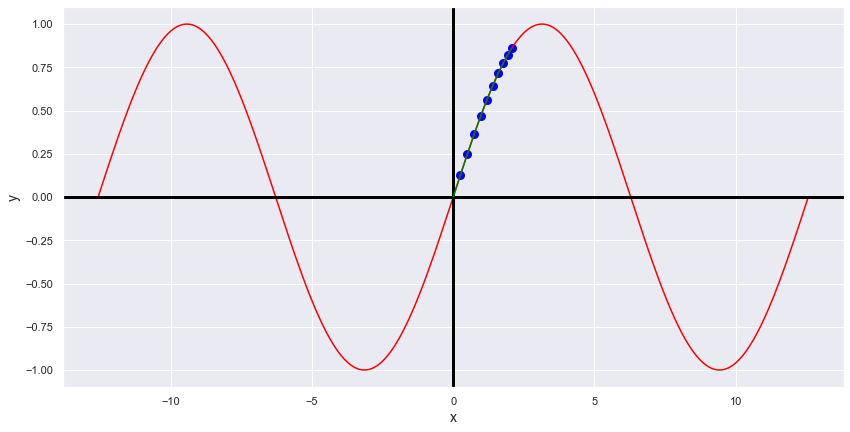

In [11]:
axes = get_plot(x, f)
gradient_descent_to_max(x0=0, sigma=0.5, f=f, df=df, iters=10, axes=axes)

Как мы видим, увеличение темпа спуска увеличил скорость спуска к локальному максимуму в этом варианте. Однако в некоторых случаях это только усугубит ситуацию. 